In [1]:
import tifffile as tiff
from octvision3d.utils import get_filenames
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

In [3]:
path = "/data/dkermany_data/OCT/nnUNet_raw/external_tests/Rasti_nnUNet/imagesTs/reshaped/"
label_path = "/data/dkermany_data/OCT/nnUNet_raw/external_tests/Rasti_nnUNet/labelsTs/reshaped/"
pred_path = "/data/dkermany_data/OCT/nnUNet_raw/external_tests/Rasti_nnUNet/imagesTs/reshaped/predicted2/"

color_map = {
    1:  "#80ae80", # SRM
    2:  "#b17a65", # HRM
    3:  "#6fb8d2", # FLU
    4:  "#d8654f", # HTD
    5:  "#90ee90", # RPE
    6:  "#a200ff", # RET
    7:  "#8f8f70", # CHO
    8:  "#e1f0fd", # VIT
    9:  "#75fafd", # HYA
    10: "#b0fdd1", # SHS
    11: "#fdfd54", # ART
    12: "#387df8", # ERM
    13: "#643200", # SES
}

(19, 496, 1024)
[ 1  4  5  6  7  8  9 10 11] [  12665   42425   96985 1392685 5004285 2762539   69812  174504   94276]


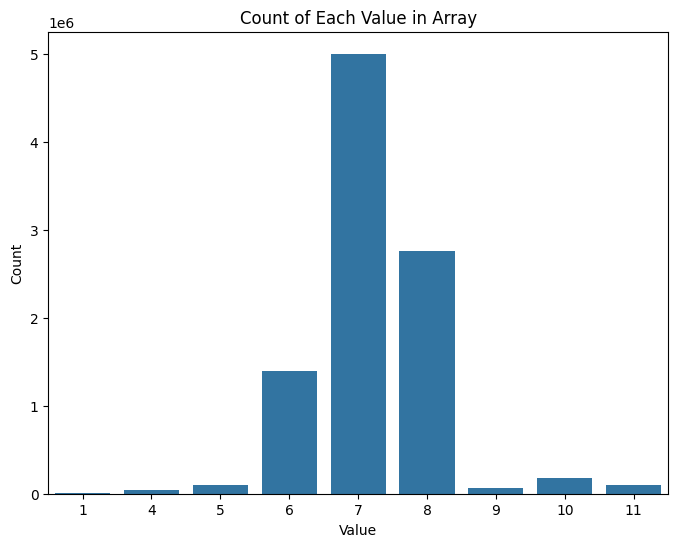

Prediction


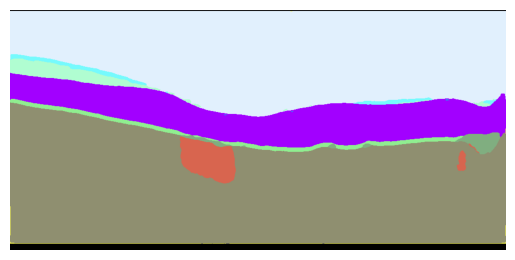

Label


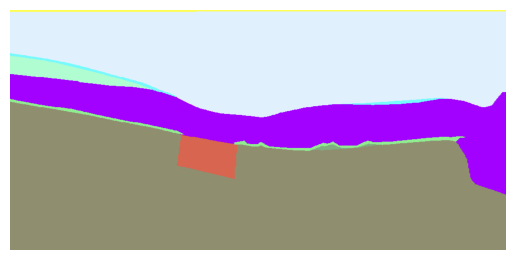

Original


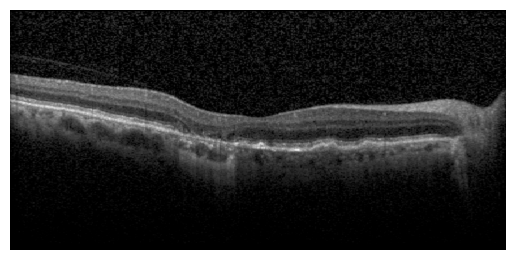

(19, 496, 1024)
[ 1  3  4  5  6  7  8  9 10 12] [  32094      72   70986   96755 1408052 5208179 2659065   54600  113574
    6799]


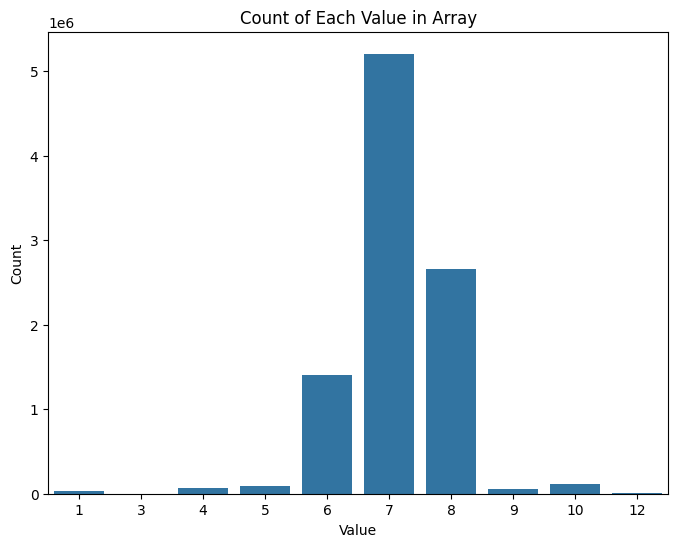

Prediction


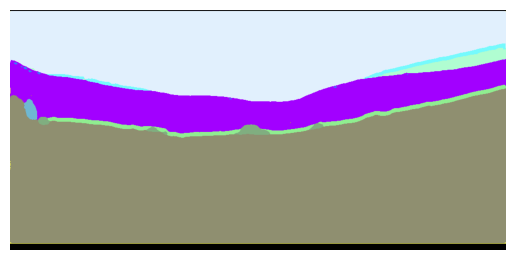

Label


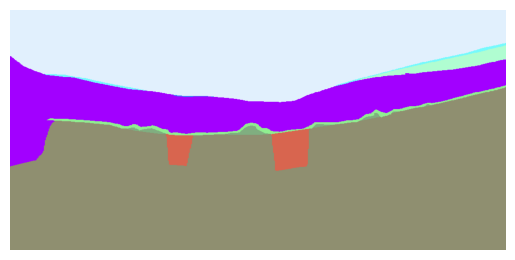

Original


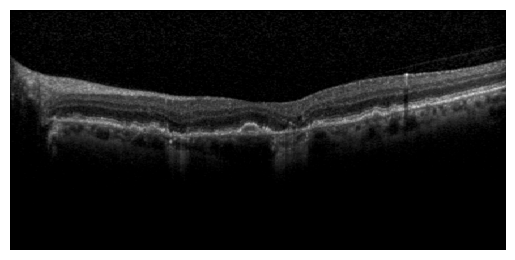

(19, 496, 1024)
[ 1  3  5  6  7  8  9 10 11 12 13] [  26360    1558  106544 1325776 3856434 1954350  100554 1036384 1108630
  103930   29656]


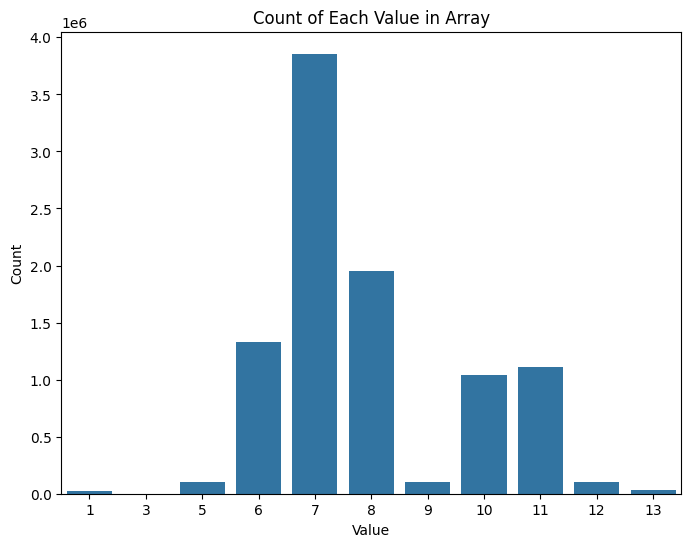

Prediction


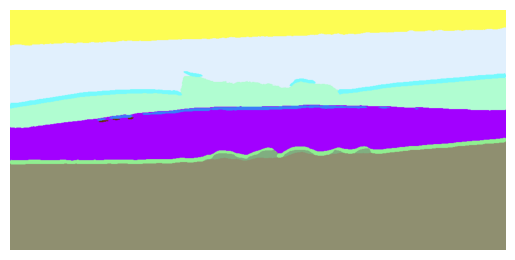

Label


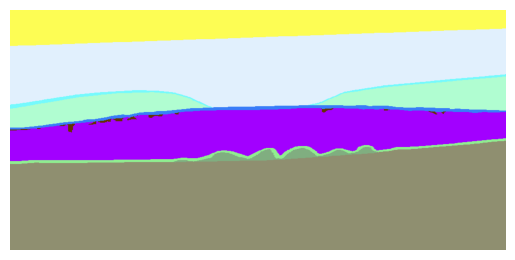

Original


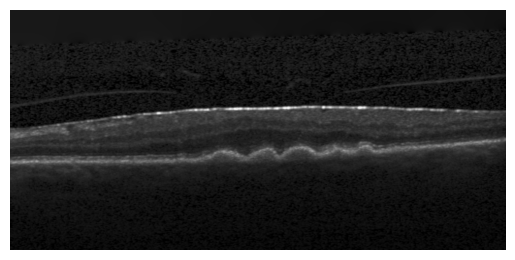

(19, 496, 1024)
[ 1  4  5  6  7  8 11 12] [  11447   41421  111553 1240904 5331487 2268796  642776    1792]


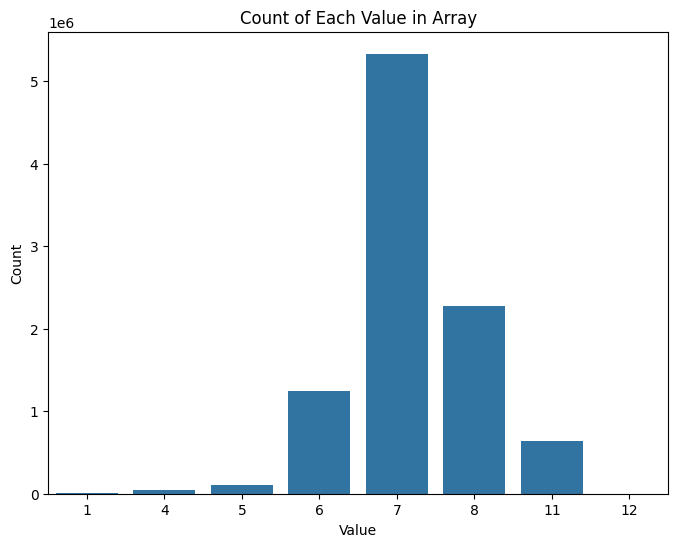

Prediction


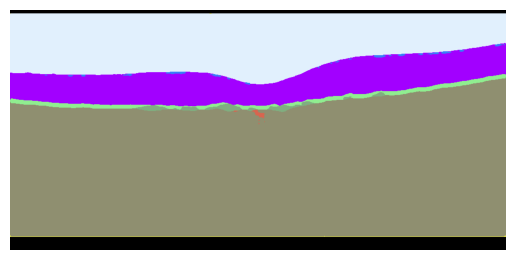

Label


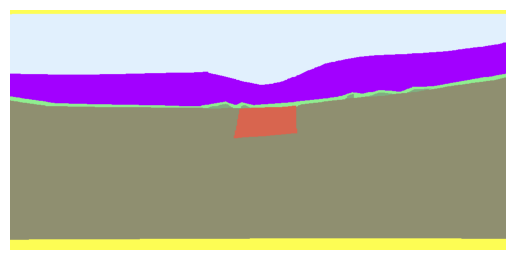

Original


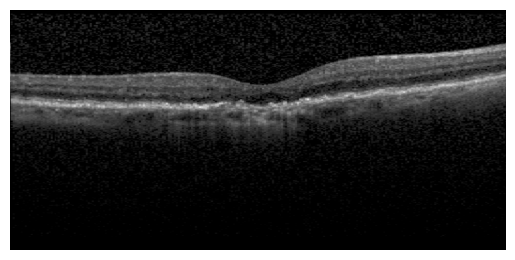

(19, 496, 1024)
[ 1  2  3  5  6  7  8  9 10 11 12 13] [  32292     262    2510  105038 1335410 3428658 1839004  100118 1276548
 1393358   97142   39836]


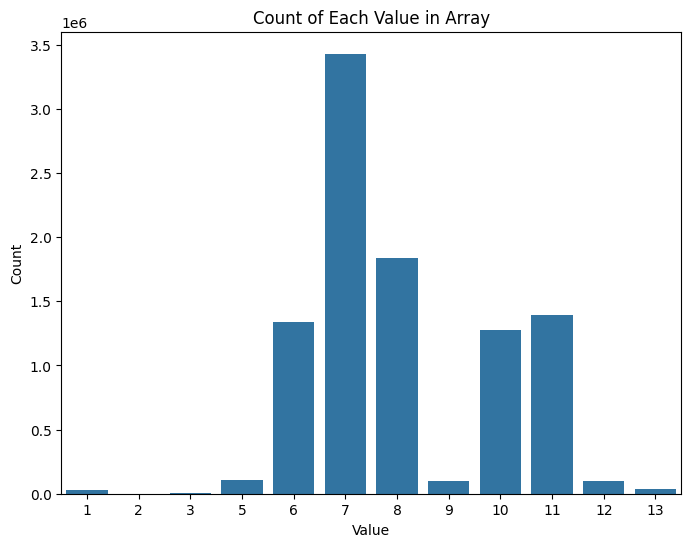

Prediction


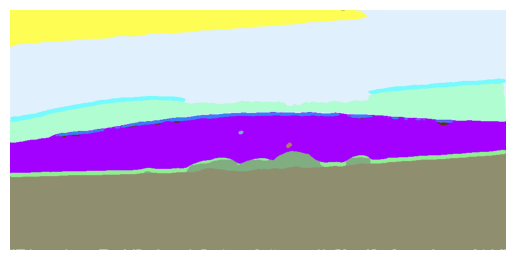

Label


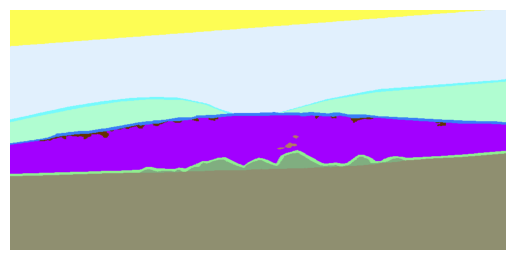

Original


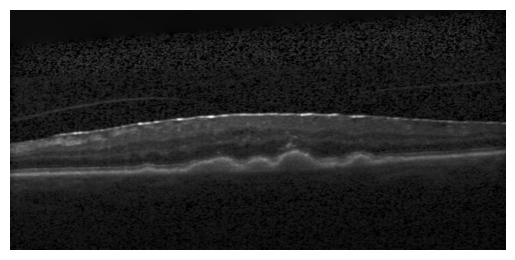

(19, 496, 1024)
[ 1  5  6  7  8  9 10 11] [   4168   98902 1381844 2286140 1131742   65236 1796338 2885806]


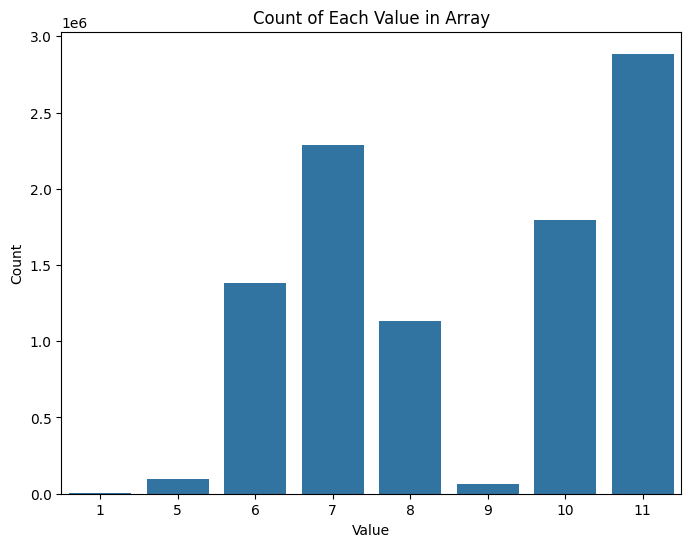

Prediction


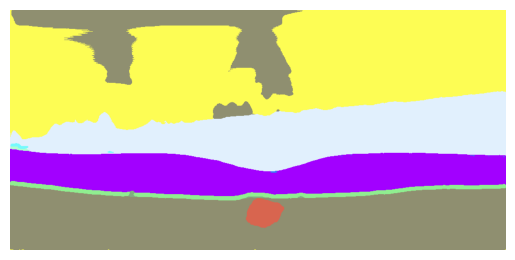

Label


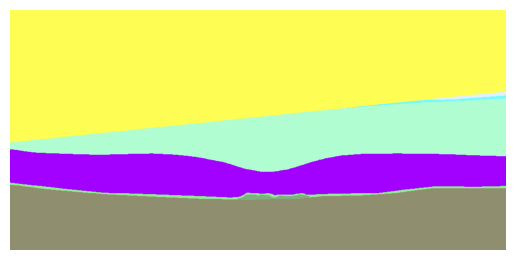

Original


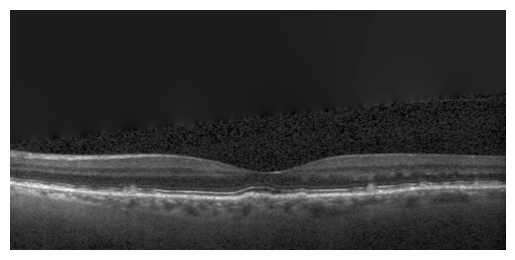

(19, 496, 1024)
[ 1  3  5  6  7  8  9 10 11] [   8444      42  101052 1364912 5096078  725116   60800 1520994  772738]


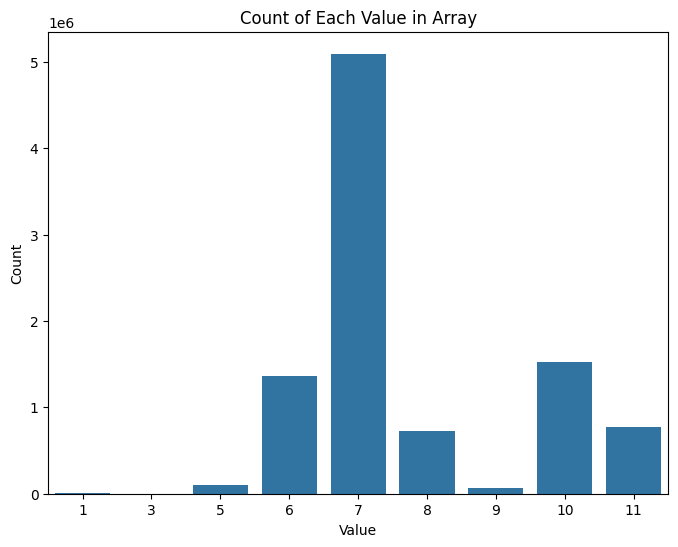

Prediction


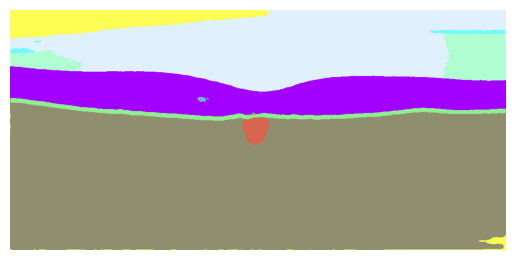

Label


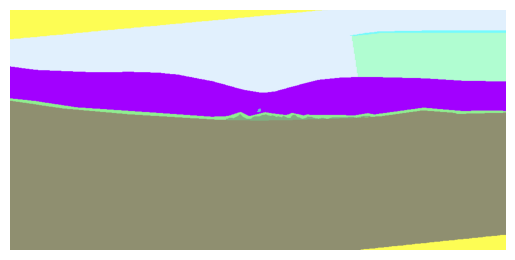

Original


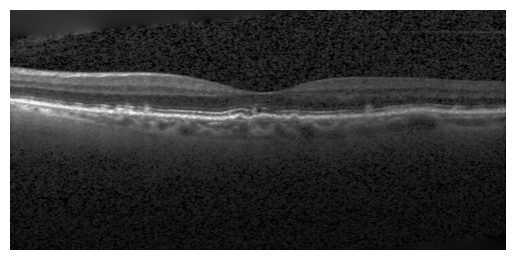

(19, 496, 1024)
[ 1  3  5  6  7  8 11] [   9438     558   99934 1337104 5154002 1714566 1334574]


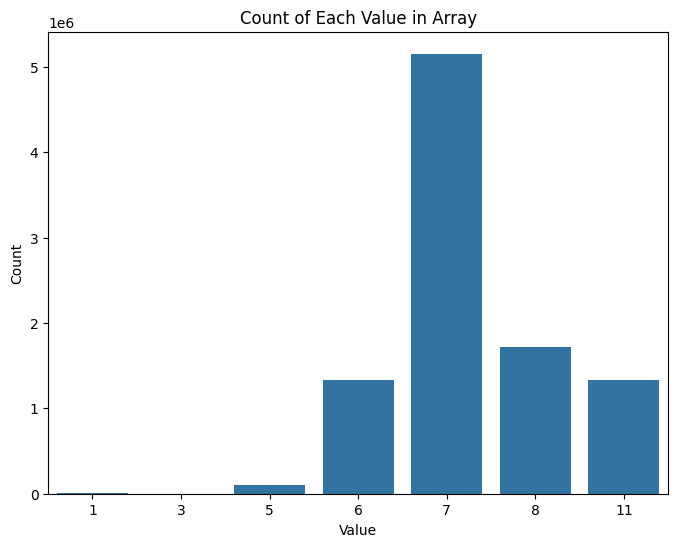

Prediction


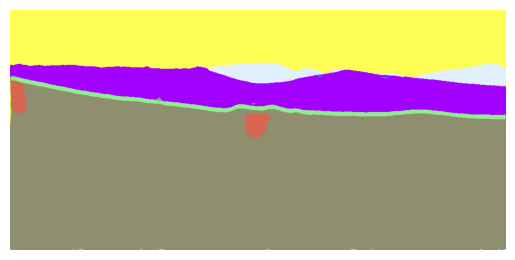

Label


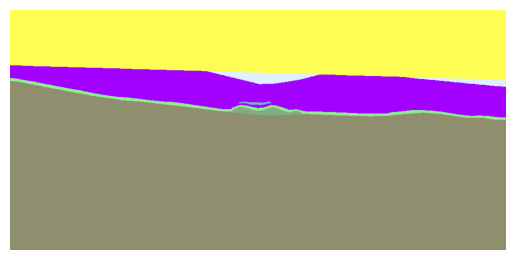

Original


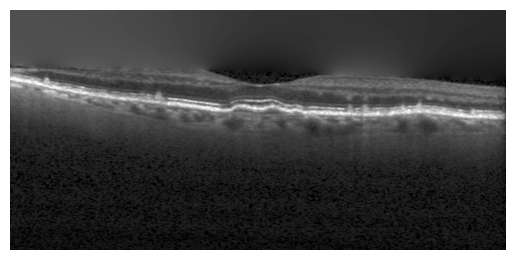

(18, 496, 1024)
[ 1  3  5  6  7  8  9 10 11] [   6184     324   87973 1328698 4421742 2062413   54055  502112  678771]


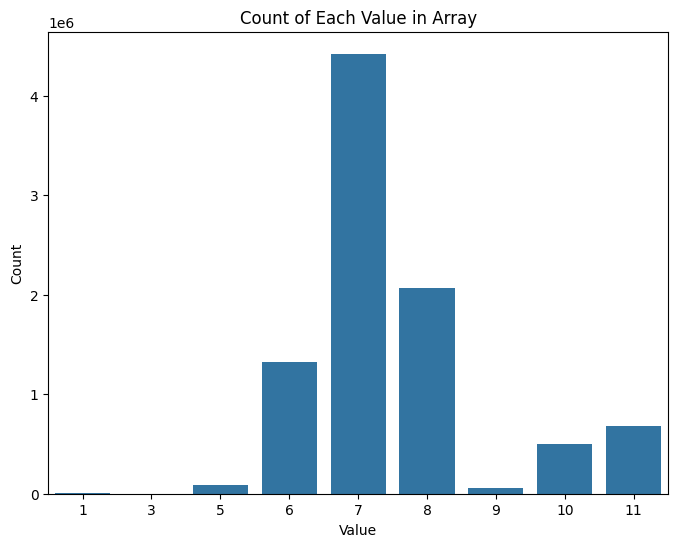

Prediction


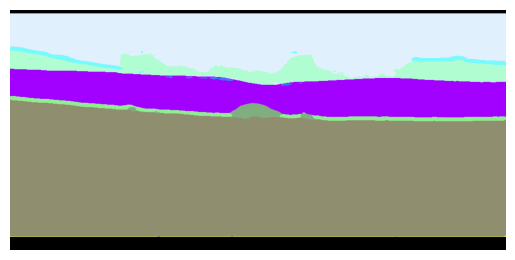

Label


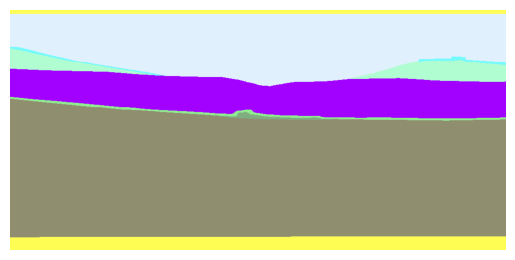

Original


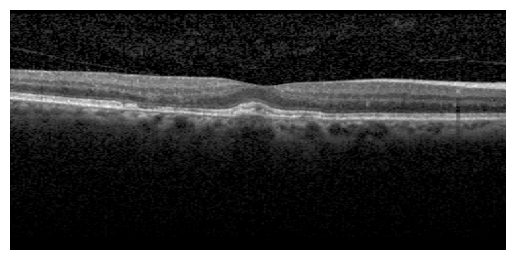

(19, 496, 1024)
[ 1  3  5  6  7  8 11] [   4884     322   96754 1344164 5191170 2627084  385798]


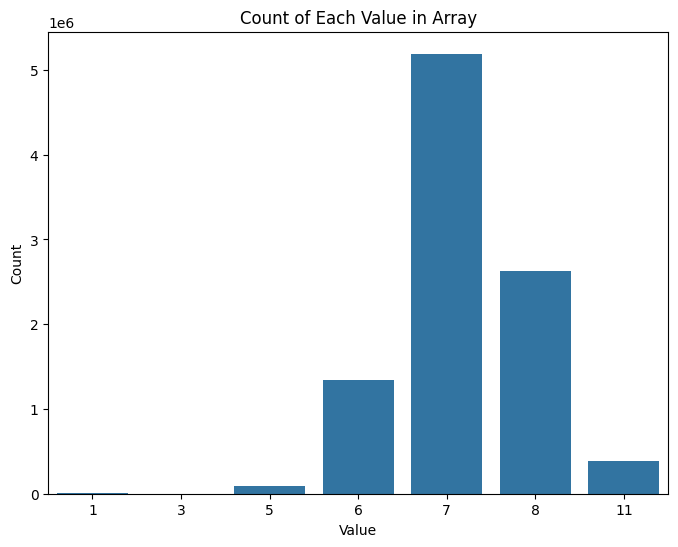

Prediction


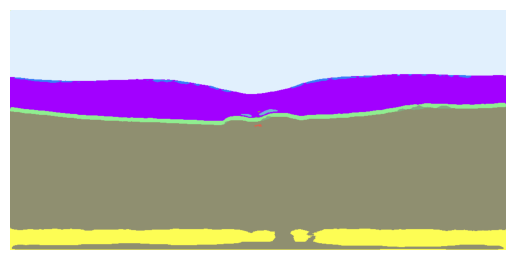

Label


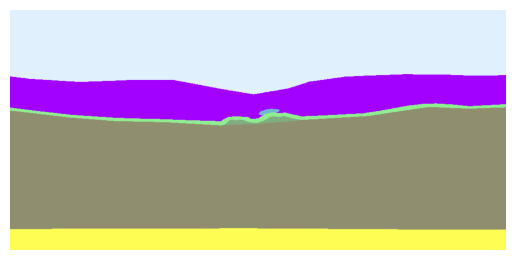

Original


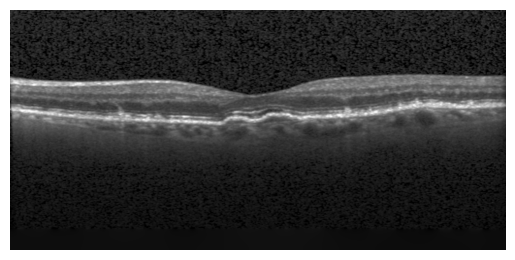

(19, 496, 1024)
[ 1  2  3  4  5  6  7  8 11] [  56980      88      28    6864   95936 1375580 5648322 2158266  308112]


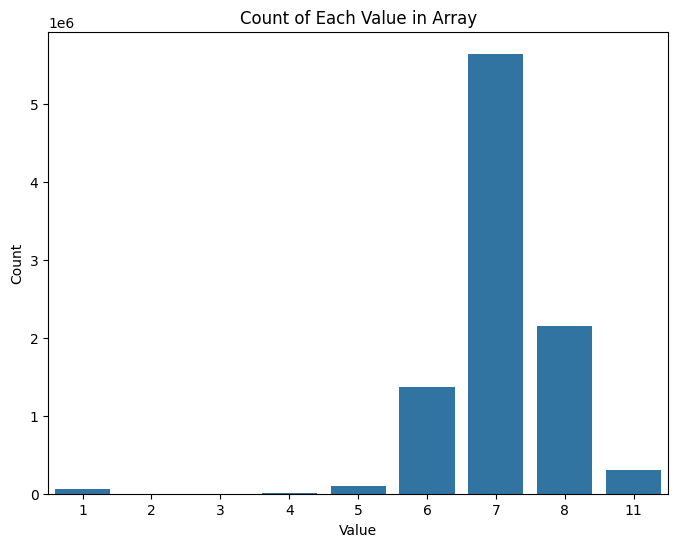

Prediction


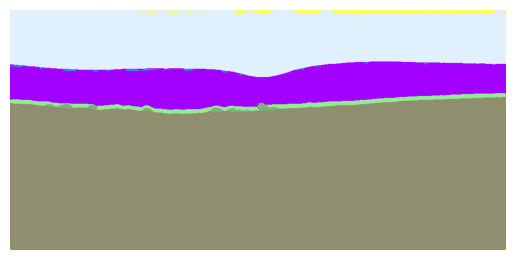

Label


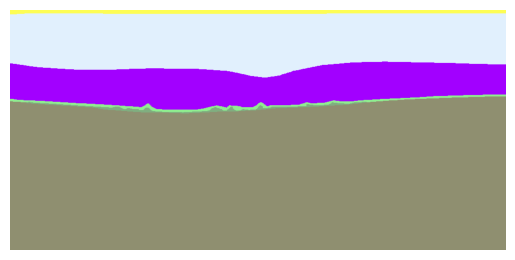

Original


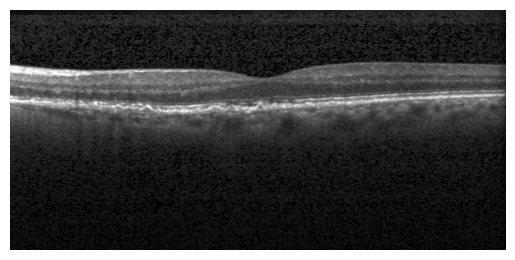

(19, 496, 1024)
[ 1  3  4  5  6  7  8 11 12] [  34083     583   79914   70981 1159050 6063605 1871008  364348    6604]


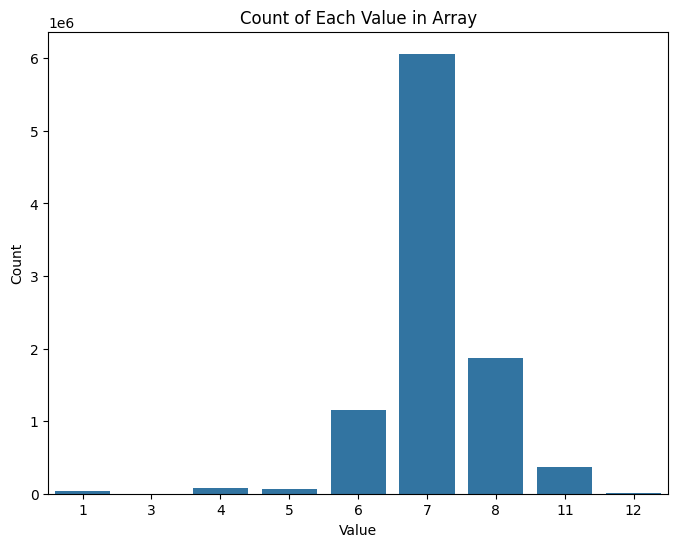

Prediction


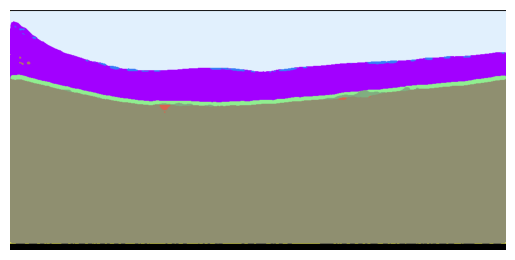

Label


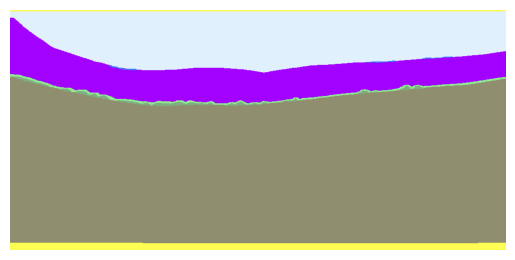

Original


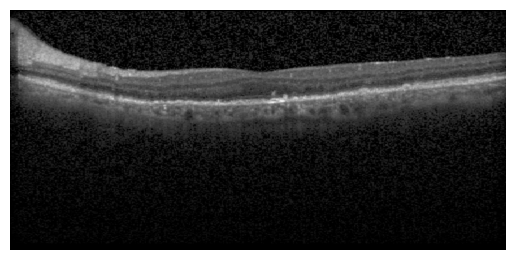

(19, 496, 1024)
[ 1  2  3  4  5  6  7  8  9 11 12] [  72864     570    1420   20008   91112 1336030 5690990 2078536     920
  355942    1784]


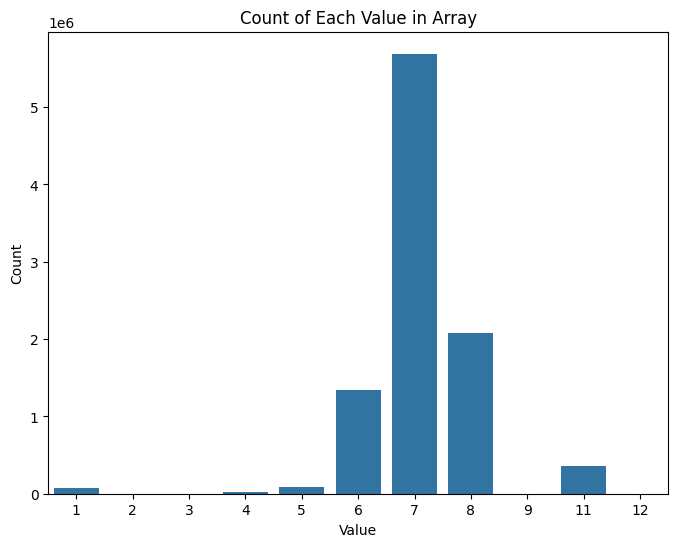

Prediction


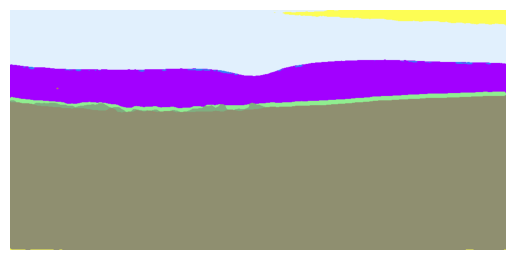

Label


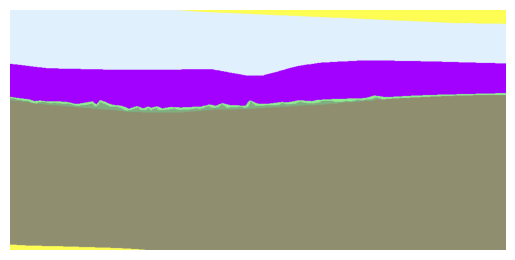

Original


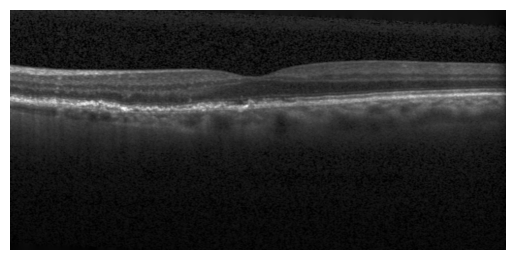

(19, 496, 1024)
[ 1  2  4  5  6  7  8 11 12] [  77632     542   11208   88040 1320570 3196068 2472120 2482418    1578]


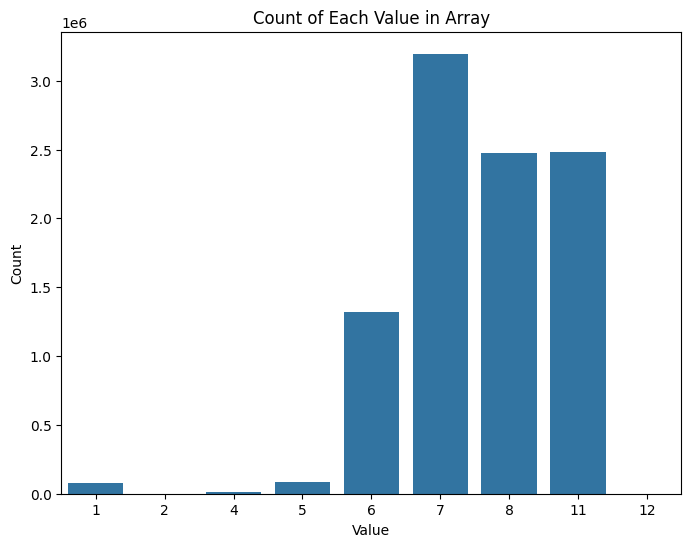

Prediction


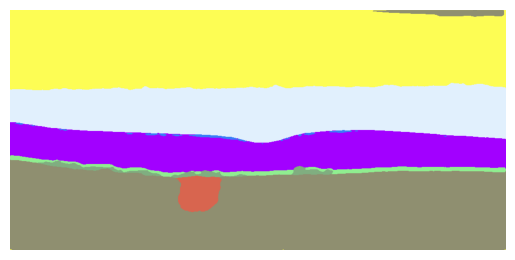

Label


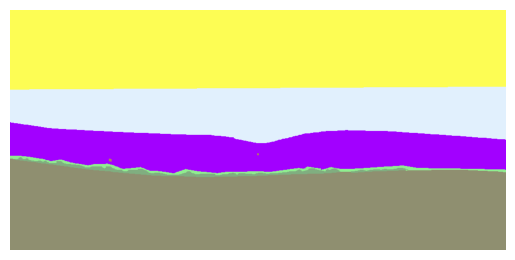

Original


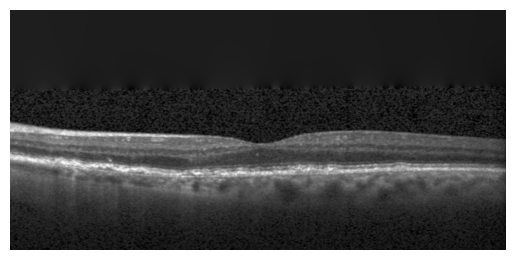

(18, 496, 1024)
[ 1  5  6  7  8  9 10 11] [  12056   76967 1350840 5584091 1436047    5986    1527  674758]


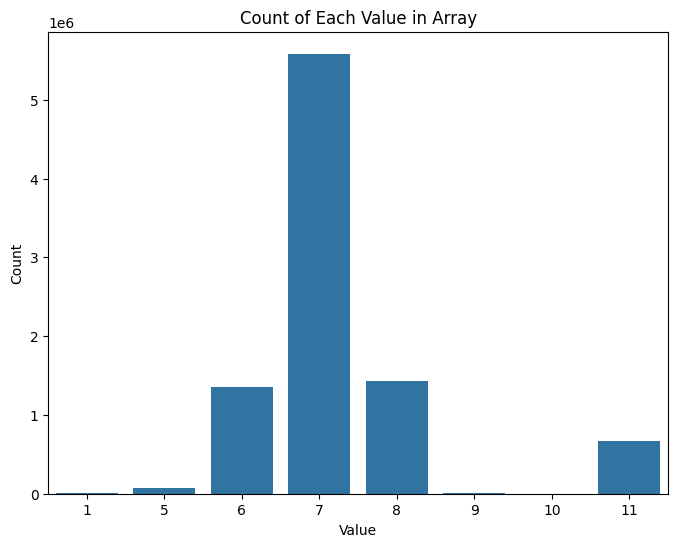

Prediction


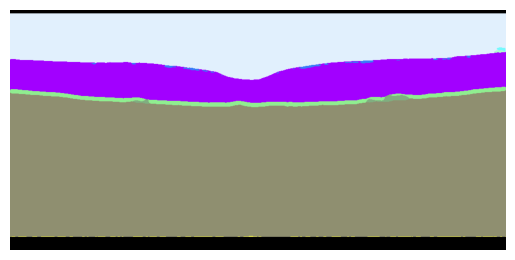

Label


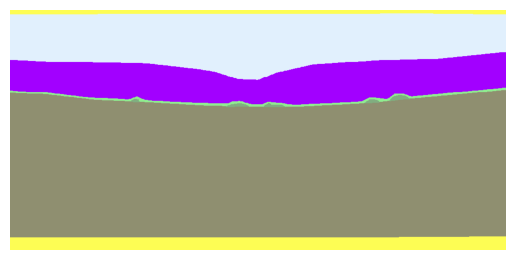

Original


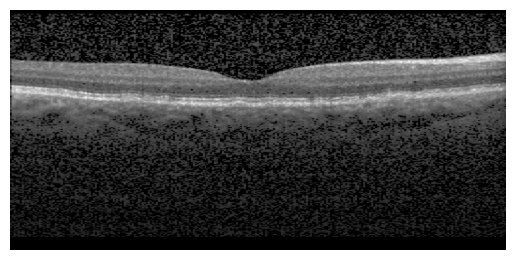

(19, 496, 1024)
[ 1  5  6  7  8 11 12 13] [  13331   96828 1280833 3973232 3530061  753277    1966     648]


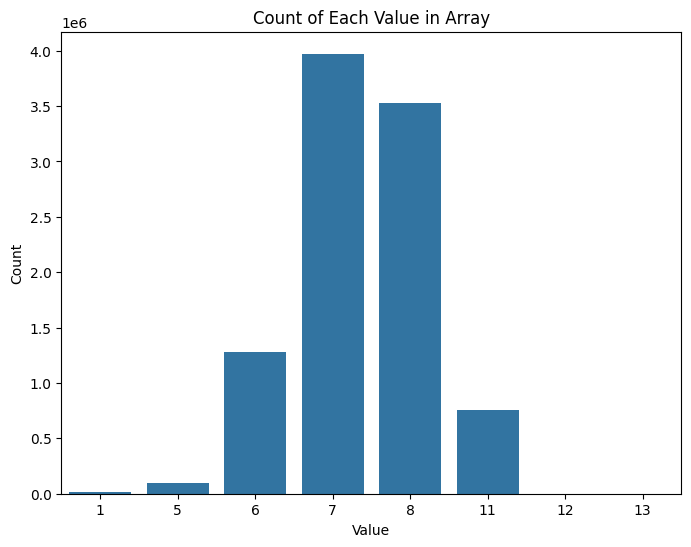

Prediction


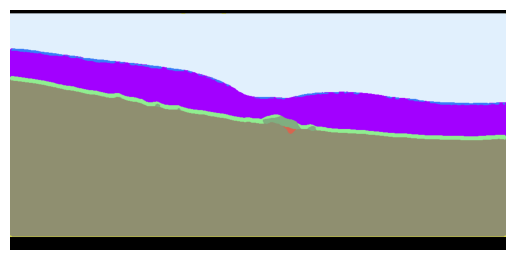

Label


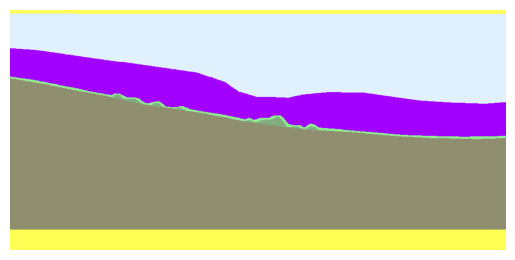

Original


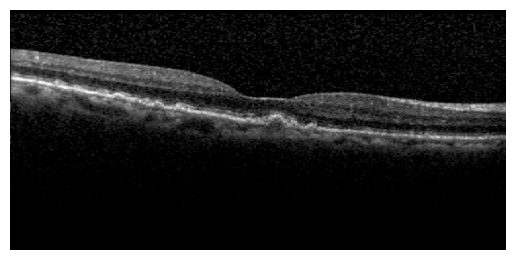

(19, 496, 1024)
[ 1  2  4  5  6  7  8 11 12] [  22498      28    1934   80886 1298733 3662036 3862389  721506     166]


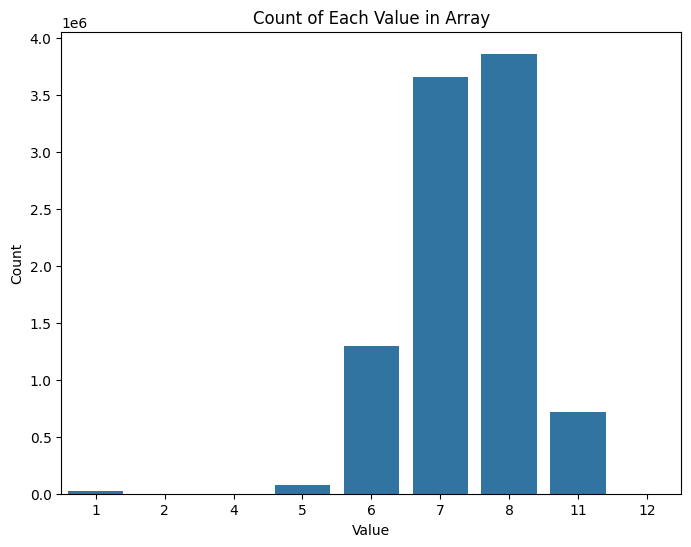

KeyboardInterrupt: 

In [4]:
for f, label_f, pred_f in zip(get_filenames(path, "tif"),
                              get_filenames(label_path, "tif"),
                              get_filenames(pred_path, "tif")):
    orig = tiff.imread(f)
    label = tiff.imread(label_f)
    pred = tiff.imread(pred_f)
    print(label.shape)

    unique_values, counts = np.unique(label, return_counts=True)
    print(unique_values, counts)

    # Create a bar plot using seaborn
    plt.figure(figsize=(8, 6))
    sns.barplot(x=unique_values, y=counts)
    
    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title('Count of Each Value in Array')
    
    # Show the plot
    plt.show()

    # Create an empty color image with shape (z, y, x, 3) for RGB channels
    z, y, x = orig.shape
    color_pred = np.zeros((z, y, x, 3), dtype=np.uint8)
    color_label = np.zeros((z, y, x, 3), dtype=np.uint8)

    # Map the grayscale image to the color image
    for grayscale_value, hex_color in color_map.items():
        rgb_color = hex_to_rgb(hex_color)
        color_pred[pred == grayscale_value] = rgb_color
        color_label[label == grayscale_value] = rgb_color

    
    print("Prediction")
    plt.axis("off")
    plt.imshow(color_pred[9])
    plt.show()
    print("Label")
    plt.axis("off")
    plt.imshow(color_label[9])
    plt.show()
    print("Original")
    plt.axis("off")
    plt.imshow(orig[9], cmap="gray")
    plt.show()

    # for i in range(19):
    #     output_name = os.path.splitext(f)[0] + f"slice{i}.png"
    #     # plt.axis("off")
    #     # plt.imshow(orig[i], cmap="gray")
    #     # plt.show()
    #     cv2.imwrite(output_name, orig[i])
    # break

